## 

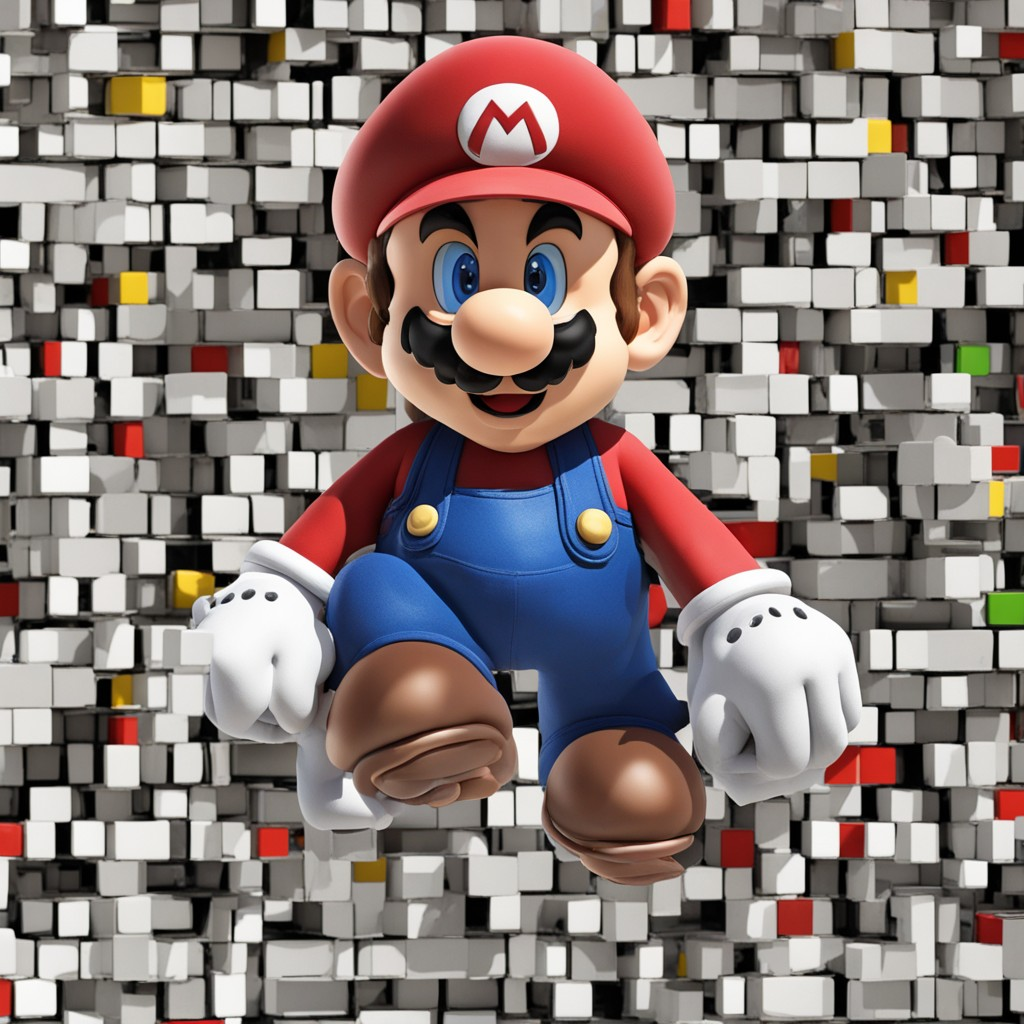

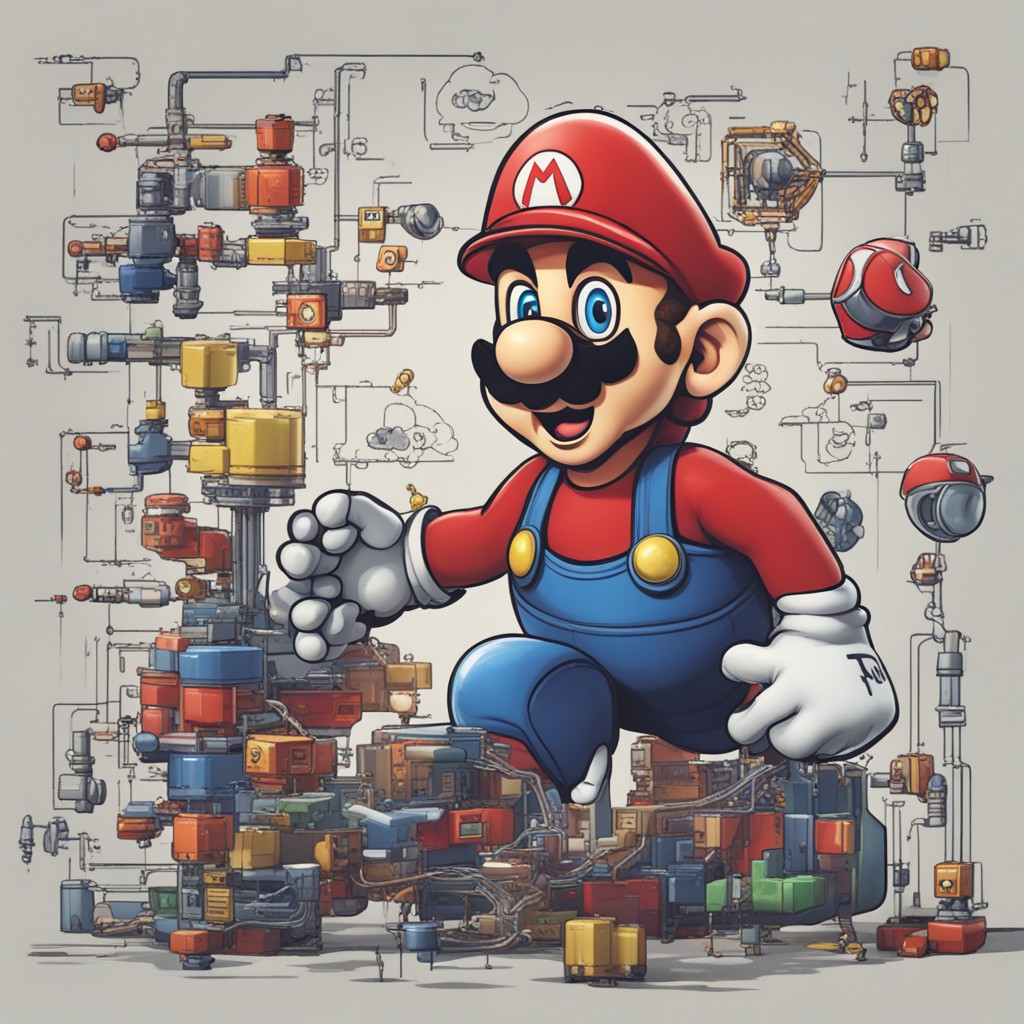

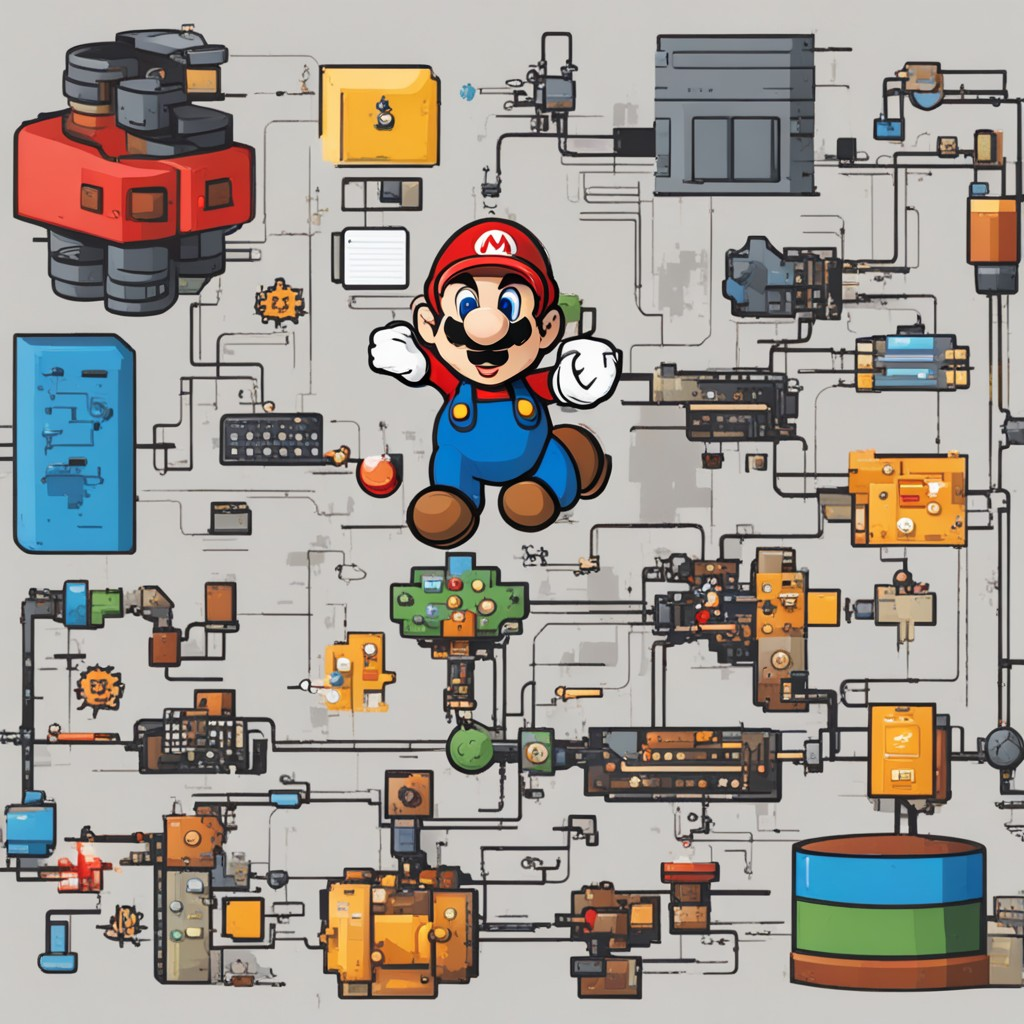

In [36]:
from dotenv import load_dotenv
import os 
import requests
from PIL import Image
import io, base64
from datetime import datetime

load_dotenv() 

# create path to save images
images_path = './data'
os.makedirs(f"{images_path}", exist_ok=True )

# url
invoke_url = "https://ai.api.nvidia.com/v1/genai/stabilityai/stable-diffusion-xl"

# prompt for image gen
prompt = 'super mario data engineer, data pipelines, it, business insights, processes, automation, business intelligence, data, analytics, high detail, sharp focus, 4k, cyber'

# have an .env file with API_KEY from nvidia
headers = {
    "Authorization": f"Bearer {os.getenv('API_KEY')}",
    "Accept": "application/json",
}

payload = {
    "text_prompts": [
		{
			"text": prompt,
			"weight": 1
		},
		{
			"text": "",
			"weight": -1
		}
	],
    "cfg_scale": 5,
    "sampler": "K_DPM_2_ANCESTRAL",
    "seed": 0,
    "steps": 25
}

# generate and save 3 images
for i in range(3):
	# make request
	response = requests.post(invoke_url, headers=headers, json=payload)

	response.raise_for_status()
	response_body = response.json()
	
	# decode base64 image
	image_base64 = response_body.get('artifacts')[0].get('base64')
	image = Image.open(io.BytesIO(base64.decodebytes(bytes(image_base64, 'utf-8'))))

	# Generate a timestamp
	timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

	# Append the timestamp to the image filename
	output_path = os.path.join(images_path,f'image_{timestamp}.jpg')

	# Save the image with the modified filename
	image.show()
	image.save(output_path)
